## Load time lapse fluorescence data from Matlab file "task1.mat" that is in the main course folder. Data are stored in two matrices: x_norm contains trajectories and t is a time vector

In [1]:
#import necessary tools, please add yourself here whatever you think you might need to solve the task

#basics
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plotter 
from scipy.fftpack import fft 
from scipy.signal import find_peaks

# load the data
data = sio.loadmat('./task1.mat')

# get traces for gfp and time
x = np.transpose(data['x_norm']) # We transpose it first so we can plot it

time = np.transpose(data['t']) # Same

## Plot (with labels) example cell tracetories | Tip: transpose the loaded data to get first dimension the same

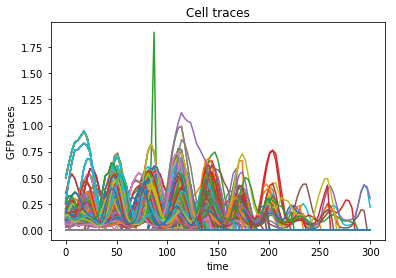

In [3]:
plotter.plot(time,x)
plotter.title("Cell traces")
plotter.xlabel("time")
plotter.ylabel("GFP traces");

## Find peaks in each trajectories usin scipy library functions | Tip: Search for suitable functions in scipy manual

In [5]:
# this loop gives us the mean of the hights
def loop1(x):
    output = np.empty(len(x.T))
    for i in range(len(x.T)): # len in the number of columns
        a=x[:,i]
        amp=find_peaks(a, height=0)
        peak_heights= amp[1]
        #peak_indexes = amp[0]
        values = list(peak_heights.values())
        #print(values)
        output[i] = np.mean(values)
    return output

heights = loop1(x)
heights # amp

/home/osboxes/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/osboxes/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([0.21722033, 0.29217034, 0.26584087, 0.35456353,        nan,
       0.21191484, 0.16296327, 0.13643792, 0.39734836, 0.21048543,
       0.21160583, 0.27386691, 0.21297613, 0.1854178 , 0.27406711,
       0.26253878, 0.1854178 , 0.2997898 , 0.32483557, 0.33375937,
       0.37374346, 0.24887625,        nan, 0.2703485 , 0.33148867,
       0.21515548, 0.31813031, 0.23353116, 0.15299426, 0.2079524 ,
       0.23410156, 0.29763667, 0.70090341, 0.30421657, 0.29742299,
              nan, 0.09388188, 0.5291104 , 0.2316054 ,        nan,
       0.21191484, 0.34626792, 0.30014499, 0.29488804, 0.03878479,
       0.10561378, 0.1854178 , 0.31613673, 0.3704287 , 0.27916602,
       0.18316149, 0.10561378, 0.21191484, 0.2275461 , 0.28586096,
       0.43085518, 0.1854178 , 0.22644603, 0.37152309, 0.27386691,
       0.20192059, 0.24023171, 0.33500027, 0.26898629,        nan,
              nan, 0.14677161, 0.32387777, 0.21935282, 0.17717354,
       0.34288974, 0.21785568, 0.25775764, 0.26159277, 0.34605

## Calculate amplitude and period of oscillations | Tip: the period of oscillation is a distance between peaks in a single cell trajectory

In [6]:
def substract_indexes(x):
    output = np.empty(len(x.T)) # vector to store all the values of the substractions as lists
    output2= [] # list to append the values of the substraction for each cell trajectory
    for w in range(len(x.T)):
        b=x[:,w]
        peaks=find_peaks(b)
        values2 = peaks[0].tolist()
        differences = [] # list to store each substraction
        for w in range(len(values2)-1):
            b = values2[w+1] - values2[w] # substraction
            differences.append(b)
        output2.append(differences)
    output = output2
    return output

distance_peaks = substract_indexes(x)
distance_peaks

[[5, 6, 13, 6],
 [11, 10, 10, 7],
 [10, 9, 10, 11, 10],
 [],
 [],
 [5, 9, 2, 2, 8],
 [],
 [6, 5, 2, 7, 5],
 [10, 11, 10, 11],
 [7, 13, 5],
 [8],
 [],
 [],
 [8, 10],
 [10, 11],
 [7, 11, 6, 4],
 [8, 10],
 [10, 12, 9, 9],
 [11, 11, 10, 6],
 [11, 10],
 [7, 11, 11],
 [9, 11, 7],
 [],
 [2, 7],
 [11, 10, 11, 7],
 [8, 6, 5],
 [2, 10, 11, 10],
 [8, 4, 6, 8],
 [6, 10, 8],
 [5, 7, 11],
 [8],
 [12, 11, 3],
 [7, 10, 11],
 [2, 10, 12],
 [9, 11],
 [],
 [5, 9, 9, 11, 7],
 [12, 13],
 [6, 14],
 [],
 [5, 9, 2, 2, 8],
 [12, 13, 11],
 [13, 12, 11, 10],
 [14, 12],
 [],
 [5, 9, 10],
 [8, 10],
 [9, 6, 6, 6, 11, 12, 9],
 [8, 4, 6, 11, 12, 10, 10],
 [9, 10, 10, 9],
 [11, 8, 6],
 [5, 9, 10],
 [5, 9, 2, 2, 8],
 [8, 6, 6],
 [8, 6, 5, 8],
 [9, 11],
 [8, 10],
 [6, 14],
 [14, 7],
 [],
 [9, 2, 9, 4],
 [9, 10, 9, 8],
 [14, 12],
 [11, 9],
 [],
 [],
 [8, 10],
 [13, 11, 8],
 [7, 13, 8],
 [8, 10, 8],
 [13, 11, 10, 7],
 [11, 7],
 [5, 9],
 [5, 8],
 [10, 12, 9],
 [9, 10, 11],
 [11, 12, 11],
 [10, 8, 11],
 [10, 8, 11, 11, 10],

In [8]:
#calculate the means of the differences, which correspond to the PERIODS
def mean_distances(distance_peaks):
    output4=np.empty(len(distance_peaks))
    for v in range(len(distance_peaks)):
        c=distance_peaks[v]
        output4[v]= np.mean(c)
    return output4 

periods = mean_distances(distance_peaks)
periods

/home/osboxes/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/osboxes/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([ 7.5       ,  9.5       , 10.        ,         nan,         nan,
        5.2       ,         nan,  5.        , 10.5       ,  8.33333333,
        8.        ,         nan,         nan,  9.        , 10.5       ,
        7.        ,  9.        , 10.        ,  9.5       , 10.5       ,
        9.66666667,  9.        ,         nan,  4.5       ,  9.75      ,
        6.33333333,  8.25      ,  6.5       ,  8.        ,  7.66666667,
        8.        ,  8.66666667,  9.33333333,  8.        , 10.        ,
               nan,  8.2       , 12.5       , 10.        ,         nan,
        5.2       , 12.        , 11.5       , 13.        ,         nan,
        8.        ,  9.        ,  8.42857143,  8.71428571,  9.5       ,
        8.33333333,  8.        ,  5.2       ,  6.66666667,  6.75      ,
       10.        ,  9.        , 10.        , 10.5       ,         nan,
        6.        ,  9.        , 13.        , 10.        ,         nan,
               nan,  9.        , 10.66666667,  9.33333333,  8.66

## Draw histograms of period distribution

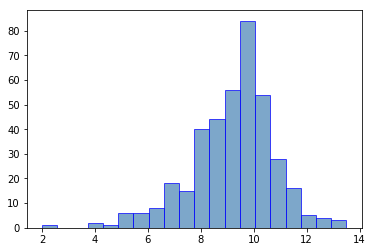

In [11]:
periods2 = periods[~np.isnan(periods)] # this deletes the nans, so we would lose the correct indexes!
# periods2 = np.nan_to_num(periods) # to convert the nans to 0, without changing the correct indexes
#periods3 = [i for i in periods2 if i!=0] # to delete the 0
plotter.hist(periods2, bins=20, alpha=0.7, color='steelblue',
         edgecolor='blue');

## Plot amplitude vs period with labels 

Text(0,0.5,'period')

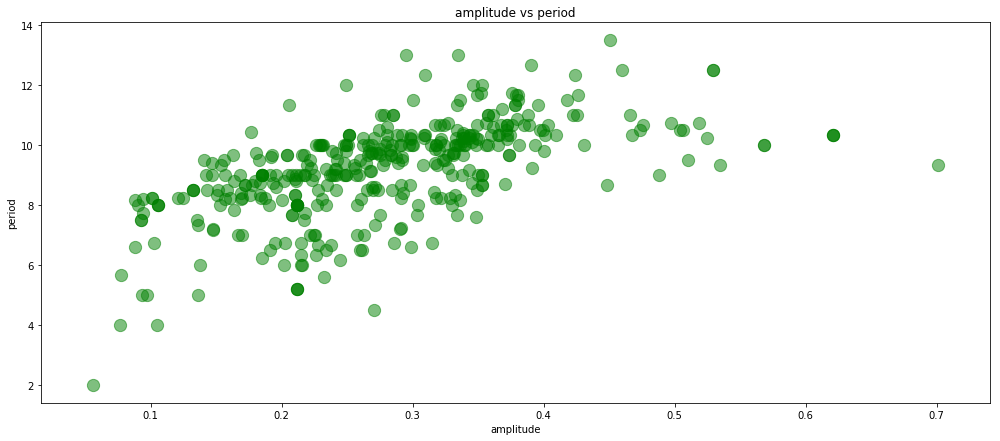

In [12]:
from matplotlib.pyplot import figure
fig, ax = plotter.subplots(figsize=(17, 7))
plotter.scatter(heights, periods, alpha=0.5, s=150, color='green', cmap='viridis')

plotter.title("amplitude vs period")
plotter.xlabel("amplitude")
plotter.ylabel("period")

## Select ten cell trajectories with the smallest periods (use the sort algorith, to find the minimal) and plot those as a heat map

In [13]:
sorted_periods = np.sort(periods)
indexes = np.argsort(periods)
print("The 10 smallest periods are:", sorted_periods[0:10])
print()
print("and their indexes are:", indexes[0:10])

The 10 smallest periods are: [2.  4.  4.  4.5 5.  5.  5.  5.2 5.2 5.2]

and their indexes are: [415 150 142  23 160 181   7  40  52   5]


In [15]:
def getting_data(x):
    output5 = np.empty(10) # define an array to include the 10 lists with the data from the cells we need
    output6 = [] # list to contain the data
    for i in indexes[0:10]:
        d = x.T[i]
        output6.append(d)
    output5 = output6
    return output5

heatmap_values = getting_data(x)
heatmap_values

[array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.0441329 , 0.0412244 , 0.06733267, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

<Figure size 640x480 with 0 Axes>

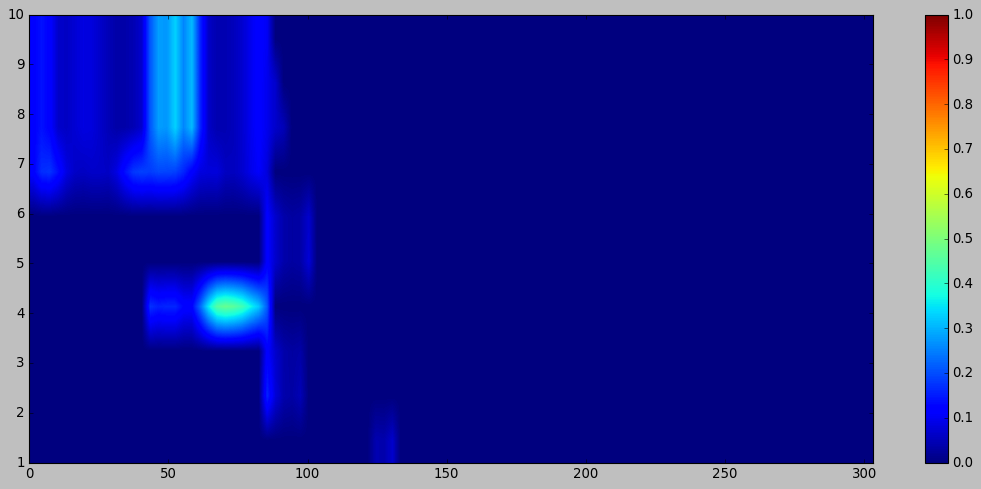

In [18]:
fig = plotter.figure() # figure object from the plot function
plotter.style.use('classic')
fig, ax = plotter.subplots(figsize=(17, 7))
plotter.imshow(heatmap_values, aspect='auto',origin='lower',
           cmap='jet', extent=[0, 3*101, 1, 10]) # to plot the image

plotter.colorbar()
plotter.clim(0,1)

## Perform frequency analysis using FFT Fourier transformation and identify a dominant frequency in the signal

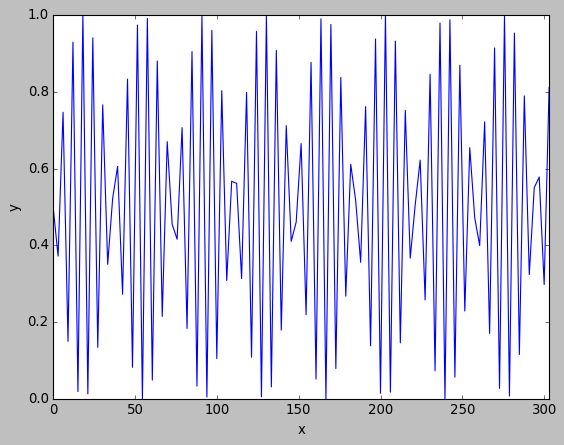

In [19]:
# N = Number of sample points
N = 101 # Because we have 101 points in the cell trajectory

# T = sample spacing
T= 3 # Because the spacing in time is 3 minutes

# F = Frequency = 1/period. We choose to analyse the cell trajectory with the 10th smallest period

F =  1/sorted_periods[10]

# the next lines are not modified
x = np.linspace(0.0, N*T, N)
y = 0.5*(1+np.sin(F * 2.0*np.pi*x))

plotter.plot(x, y)
plotter.xlabel('x')
plotter.ylabel('y')
plotter.axis('tight')
# plt.grid()
plotter.show()

Text(0,0.5,'power(signal)')

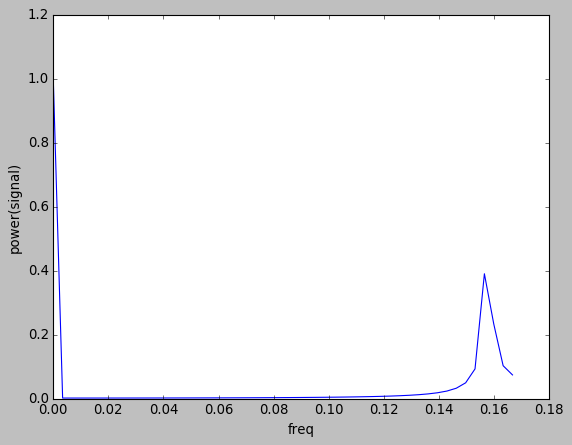

In [21]:
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plotter.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plotter.xlabel('freq')
plotter.ylabel('power(signal)')